Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#### My Result
* By doing some alters in data like under sampling ,oversampling(SMOTE) we will get good results with Logistic regression
* Xgboost gave good results without altering the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix,fbeta_score,recall_score,classification_report,accuracy_score

In [3]:
fraud = pd.read_csv("creditcard.csv")# named data as fraud :)
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
fraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## EDA

C:\PYTHON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

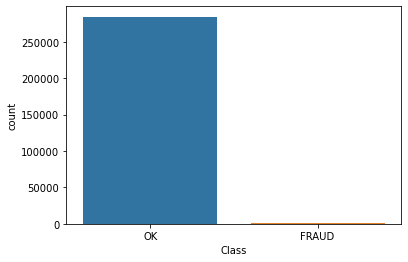

In [6]:
sns.countplot(fraud['Class'].map({0:'OK',1:'FRAUD'}))# imablanced data 

C:\PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


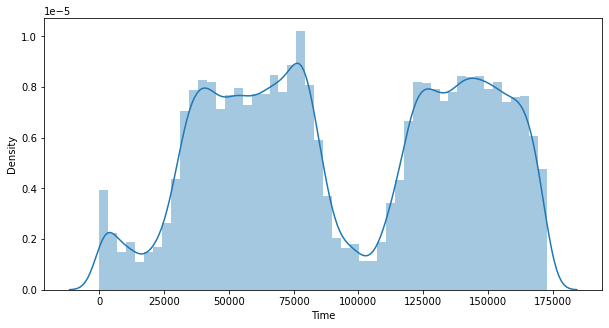

In [7]:
plt.figure(figsize=(10,5)) # time take to make transaction
sns.distplot(fraud['Time'])
plt.show()

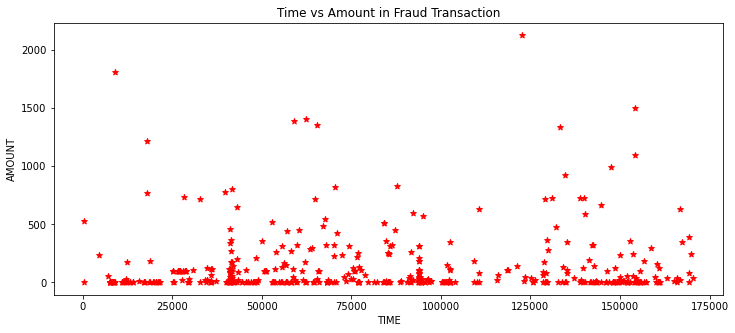

In [8]:
plt.figure(figsize=(12,5))
plt.scatter(x = fraud[fraud['Class'] == 1]['Time'],y = fraud[fraud['Class'] == 1]['Amount'],marker = '*',color = 'r')
plt.title("Time vs Amount in Fraud Transaction")
plt.xlabel("TIME")
plt.ylabel("AMOUNT")
plt.show()

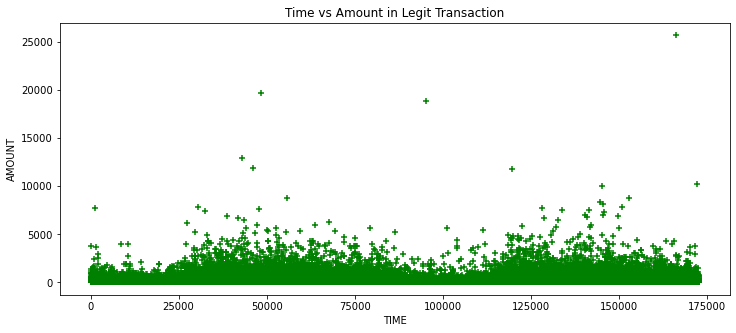

In [9]:
plt.figure(figsize=(12,5))
plt.scatter(x = fraud[fraud['Class'] == 0]['Time'],y = fraud[fraud['Class'] == 0]['Amount'],marker = '+',color = 'g')
plt.title("Time vs Amount in Legit Transaction")
plt.xlabel("TIME")
plt.ylabel("AMOUNT")
plt.show()

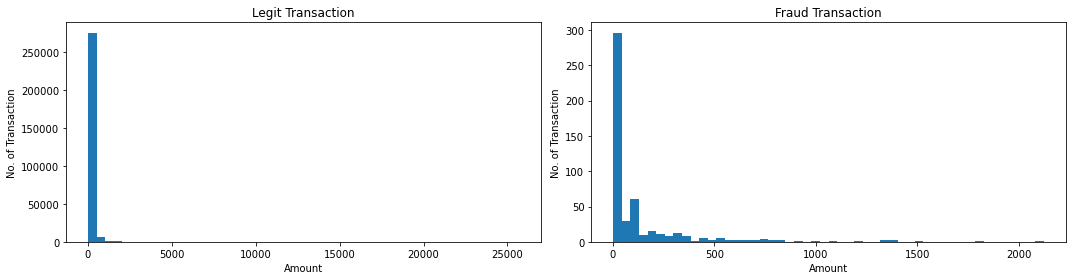

In [10]:
fig,ax = plt.subplots(nrows = 1,ncols=2,figsize = (15,4))

ax[0].hist(x = fraud[fraud['Class'] == 0]['Amount'],bins = 50)
ax[1].hist(x = fraud[fraud['Class'] == 1]['Amount'],bins = 50)

ax[0].set_title("Legit Transaction")
ax[1].set_title('Fraud Transaction')

ax[0].set_xlabel("Amount")
ax[0].set_ylabel("No. of Transaction")

ax[1].set_xlabel("Amount")
ax[1].set_ylabel("No. of Transaction")

plt.tight_layout()

## SPLITING OF DATA

In [11]:
X = fraud[fraud.columns[:-1]]
y = fraud['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [14]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [15]:
std = StandardScaler()

In [16]:
#std.fit(X_train)

In [17]:
#train = std.transform(X_train)

### MODEL

#### Computing Different Models

In [18]:
import models

In [19]:
models.clf_models(X,y,f_beta=3) 

[18:53:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
### -------------------- Predicted by RandomForestClassifier for test dataset---------------- ##
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

fbeta_score:  0.827123695976155
accuracy_score:  0.9996254813150287


### -------------------- Predicted by AdaBoostClassifier for test dataset---------------- ##
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.74      0.78       13

### XG BOOST and RandomForest gives BETTER RESULT for this imbalanced DATA

## XGBOOST

In [20]:
xgb = xg.XGBClassifier(use_label_encoder=False)

In [21]:
xgb.fit(X_train,y_train)

[18:54:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [22]:
predicted = xgb.predict(X_test)

In [23]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
confusion_matrix(y_test,predicted)

array([[56863,     1],
       [   20,    78]], dtype=int64)

In [25]:
fbeta_score(y_test,predicted,beta=3)

0.8116545265348595

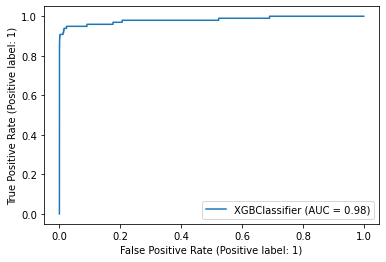

In [26]:
plot_roc_curve(xgb, X_test, y_test)

In [27]:
plot_test = X_test.copy()

In [28]:
plot_test['Class'] = y_test

In [29]:
plot_test['Predicted_Class'] = predicted

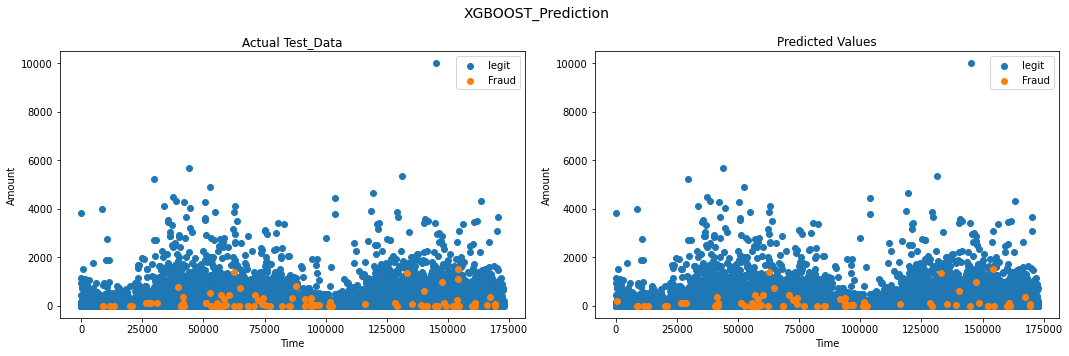

In [30]:
fig,ax = plt.subplots(figsize = (15,5),nrows=1,ncols = 2)

ax[0].scatter(x = plot_test[plot_test['Class'] == 0]['Time'],y = plot_test[plot_test['Class'] == 0]['Amount']
              ,label = 'legit')
ax[0].scatter(x = plot_test[plot_test['Class'] == 1]['Time'],y = plot_test[plot_test['Class'] == 1]['Amount'],
             label = 'Fraud')

ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amount")

ax[0].set_title("Actual Test_Data")
ax[0].legend()

ax[1].scatter(x = plot_test[plot_test['Predicted_Class'] == 0]['Time'],
              y = plot_test[plot_test['Predicted_Class'] == 0]['Amount'],label = 'legit')
ax[1].scatter(x = plot_test[plot_test['Predicted_Class'] == 1]['Time'],
              y = plot_test[plot_test['Predicted_Class'] == 1]['Amount'],label = 'Fraud')

ax[1].set_xlabel("Time")
ax[1].set_ylabel("Amount")

ax[1].set_title("Predicted Values")
ax[1].legend()

plt.suptitle("XGBOOST_Prediction", fontsize=14)
plt.tight_layout()

## Random Forest

In [31]:
rf = RandomForestClassifier(n_estimators=100)

In [32]:
rf.fit(std.fit_transform(X_train),y_train)

RandomForestClassifier()

In [33]:
rf_predicted = rf.predict(std.fit_transform(X_test))

In [34]:
print(classification_report(y_test,rf_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [35]:
plot_test = X_test.copy()

In [36]:
plot_test['Class'] = y_test

In [37]:
plot_test['Predicted_Class_rf'] = rf_predicted

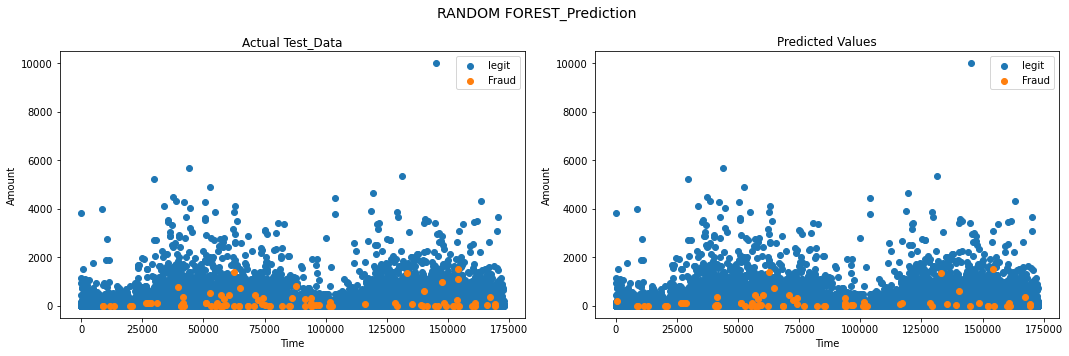

In [38]:
fig,ax = plt.subplots(figsize = (15,5),nrows=1,ncols = 2)

ax[0].scatter(x = plot_test[plot_test['Class'] == 0]['Time'],y = plot_test[plot_test['Class'] == 0]['Amount']
              ,label = 'legit',)
ax[0].scatter(x = plot_test[plot_test['Class'] == 1]['Time'],y = plot_test[plot_test['Class'] == 1]['Amount'],
             label = 'Fraud')

ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amount")

ax[0].set_title("Actual Test_Data")
ax[0].legend()

ax[1].scatter(x = plot_test[plot_test['Predicted_Class_rf'] == 0]['Time'],
              y = plot_test[plot_test['Predicted_Class_rf'] == 0]['Amount'],label = 'legit')
ax[1].scatter(x = plot_test[plot_test['Predicted_Class_rf'] == 1]['Time'],
              y = plot_test[plot_test['Predicted_Class_rf'] == 1]['Amount'],label = 'Fraud')

ax[1].set_xlabel("Time")
ax[1].set_ylabel("Amount")

ax[1].set_title("Predicted Values")
ax[1].legend()

plt.suptitle("RANDOM FOREST_Prediction", fontsize=14)
plt.tight_layout()

## LOGISTIC REGRESSION

1. Log_reg is not good for imabalanced dataset
2. We can make them good..... by altering the data
3. there are some ways to imporve perfomance in log_reg
    * Changing Class Weights
    * Resampling

In [93]:
clf = LogisticRegression()

In [94]:
clf.fit(std.fit_transform(X_train),y_train)

LogisticRegression()

In [41]:
clf_predicted = clf.predict(std.fit_transform(X_test))

In [42]:
print(classification_report(y_test,clf_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
confusion_matrix(y_test,clf_predicted)

array([[56855,     9],
       [   41,    57]], dtype=int64)

## Changing Weights of Data(logistic Regression)


In [44]:
weight_clf = LogisticRegression(class_weight={0: 100, 1: 1000})

In [45]:
weight_clf.fit(std.fit_transform(X_train),y_train)

LogisticRegression(class_weight={0: 100, 1: 1000})

In [46]:
weight_clf_predicted = weight_clf.predict(std.fit_transform(X_test))

In [47]:
print(classification_report(y_test,weight_clf_predicted))
confusion_matrix(y_test,weight_clf_predicted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.81      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



array([[56842,    22],
       [   19,    79]], dtype=int64)

### ReSampling( UnderSampling)

In [48]:
fraud2 = fraud.copy()

In [49]:
legit_data = fraud2[fraud2['Class'] == 0]

In [50]:
fraud_data = fraud2[fraud2['Class'] == 1]

In [51]:
## we havelarge data for 0 class so we can undersample class 0 data
legit_data.sample(500)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282777,171144.0,-2.199368,2.693484,-2.039843,-0.685230,0.695328,0.941400,-1.905576,-4.408650,-1.104221,...,-2.371465,1.232815,0.038334,-0.190379,-0.030305,-0.254498,0.068502,0.240003,1.00,0
262315,160415.0,-0.456800,1.049320,-0.198097,-0.570943,0.089982,-1.117379,0.603354,0.234103,-0.011204,...,-0.225241,-0.668818,0.186750,-0.141785,-0.467977,0.142451,-0.007858,0.020690,9.99,0
59189,48736.0,-0.888546,0.043805,0.644427,-2.537653,1.198245,4.037045,-1.346762,-0.001946,-0.250601,...,1.151767,0.845093,-0.096043,1.024580,0.070443,-0.116712,-0.302530,-0.140387,15.99,0
56954,47689.0,1.157922,0.404441,0.815571,2.308087,-0.245098,0.078953,-0.248887,0.184637,-0.659140,...,-0.080439,-0.361590,0.036242,-0.050721,0.277350,-0.123327,-0.006422,0.014145,0.77,0
63542,50765.0,1.190661,0.244598,0.511052,0.658084,-0.344661,-0.737170,0.103264,-0.147184,-0.094441,...,-0.144392,-0.353657,0.138841,0.422725,0.220078,0.180393,-0.015322,0.017251,7.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65142,51448.0,1.191809,-0.221339,0.924993,0.555193,-0.613413,0.494374,-0.722913,0.255736,0.687216,...,-0.089691,-0.088442,-0.089124,-0.453703,0.342427,0.349658,0.013335,0.009667,11.50,0
197066,131828.0,2.022819,-0.157414,-1.994964,0.370571,0.241834,-1.544565,0.684381,-0.494244,0.326715,...,0.117390,0.399966,-0.048321,0.052378,0.285879,0.828929,-0.134151,-0.081249,49.46,0
127293,78282.0,-1.027738,1.359117,1.109873,-0.168605,0.021295,-0.372831,0.429890,0.233445,-0.092443,...,-0.224261,-0.539637,0.066631,0.141447,-0.227231,0.070567,0.322625,0.219446,1.98,0
166124,117878.0,-0.820789,0.098478,1.330601,-0.955932,0.479447,-0.205034,0.889336,-0.296878,0.496270,...,-0.298154,-0.364224,0.116018,-0.341267,-0.825382,0.121281,0.144232,-0.077419,89.56,0


In [52]:
sampled_data = pd.concat([fraud_data,legit_data.sample(500)])

In [53]:
X2 = sampled_data[sampled_data.columns[:-1]]
y2 = sampled_data['Class']

In [54]:
 X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [55]:
lr = LogisticRegression()

In [56]:
lr.fit(std.fit_transform(X_train2),y_train2)

LogisticRegression()

In [57]:
lr_predicted = lr.predict(std.fit_transform(X_test2))

In [58]:
confusion_matrix(y_test2,lr_predicted)

array([[164,   3],
       [ 14, 147]], dtype=int64)

In [59]:
print(classification_report(y_test2,lr_predicted))
#it Gives good results but we lost many information by undersampling

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       167
           1       0.98      0.91      0.95       161

    accuracy                           0.95       328
   macro avg       0.95      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328



### SMOTE (Synthetic Minority OverSampling Technique)

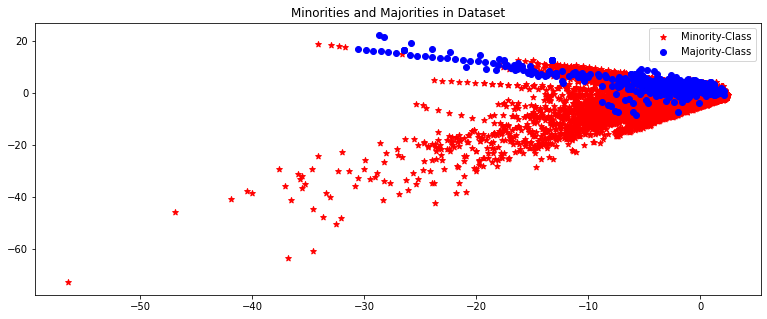

In [60]:
plt.figure(figsize=(13,5))
plt.scatter(x = fraud[fraud['Class'] == 0]['V1'],y = fraud[fraud['Class'] == 0]['V2'],marker = '*',color = 'r',
           )

plt.scatter(x = fraud[fraud['Class'] == 1]['V1'],y = fraud[fraud['Class'] == 1]['V2'],marker = 'o',color = 'blue',
           )
plt.legend(labels = {"Majority-Class","Minority-Class"})
plt.title("Minorities and Majorities in Dataset")
plt.show()

In [61]:
import imblearn as ib

In [62]:
smote = ib.over_sampling.SMOTE()

In [63]:
train_data = X_train.copy()

In [64]:
train_data['Class'] = y_train

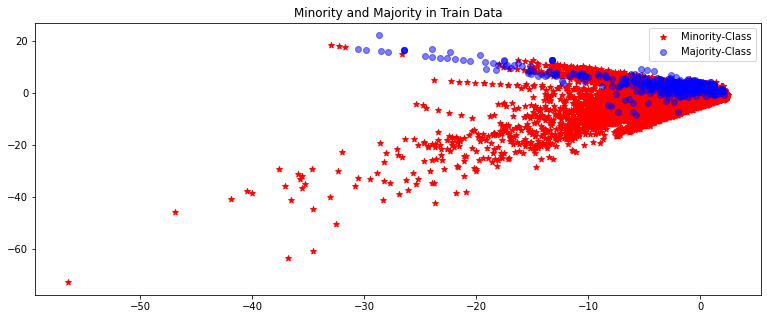

In [65]:
plt.figure(figsize=(13,5))
plt.scatter(x = train_data[train_data['Class'] == 0]['V1'],y = train_data[train_data['Class'] == 0]['V2'],
            marker = '*',color = 'r',
           )

plt.scatter(x = train_data[train_data['Class'] == 1]['V1'],y = train_data[train_data['Class'] == 1]['V2'],
            marker = 'o',color = 'blue',alpha=0.5,
           )
plt.legend(labels = {"Majority-Class","Minority-Class"})
plt.title("Minority and Majority in Train Data")
plt.show()

In [66]:
resampled_X_train,resampled_y_train = smote.fit_resample(X = X_train,y = y_train)

In [67]:
resampled_train_data = resampled_X_train.copy()

In [68]:
resampled_train_data['Class'] = resampled_y_train
# here we can see clearly data points are increased 
#but more points are coincides each other

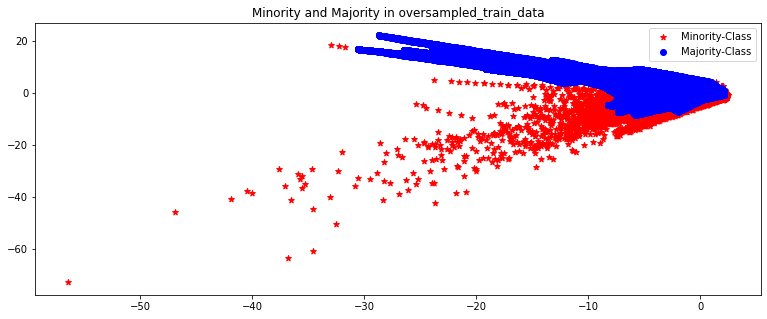

In [69]:
plt.figure(figsize=(13,5))
plt.scatter(x = resampled_train_data[resampled_train_data['Class'] == 0]['V1'],
            y = resampled_train_data[resampled_train_data['Class'] == 0]['V2'],
            marker = '*',color = 'r',
           )

plt.scatter(x = resampled_train_data[resampled_train_data['Class'] == 1]['V1'],
            y = resampled_train_data[resampled_train_data['Class'] == 1]['V2'],
            marker = 'o',color = 'blue',
           )
plt.legend(labels = {"Majority-Class","Minority-Class"})
plt.title("Minority and Majority in oversampled_train_data")
plt.show()

In [70]:
resampled_y_train.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

## OverSampled LogisticRegression


In [71]:
log_resampled = LogisticRegression()

In [72]:
log_resampled.fit(resampled_X_train,resampled_y_train)

C:\PYTHON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
log_resampled_predicted = log_resampled.predict(X_test)

In [74]:
import metrics

In [75]:
metrics.clf_metrics(y_test,log_resampled_predicted)#roc_auc is good but f1 is bad
#Precision values is very low bcz False Negative( wrongly predicted as zero (or) not fraud) 
# Since in this case Positive values (frauds) are important 
# so recall value is important

confusion_matrix :  [[55787  1077]
 [   11    87]]


fbeta_score :  0.13787638668779714


recall_score :  0.8877551020408163


classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.89      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



accuracy_score :  0.9808995470664653




## Borderline SMOTE and Logistic Regression

In [76]:
from imblearn.over_sampling import BorderlineSMOTE

In [77]:
bsmote = BorderlineSMOTE()

In [78]:
bor_X_train,bor_y_train = bsmote.fit_resample(X_train,y_train)

In [79]:
bor_data = bor_X_train.copy()

In [80]:
bor_data['Class'] = bor_y_train

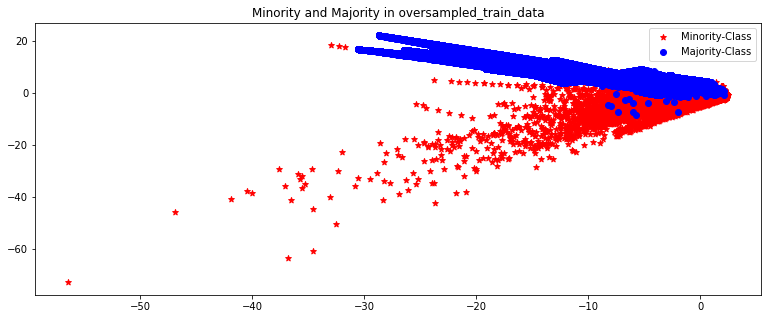

In [81]:
plt.figure(figsize=(13,5))
plt.scatter(x = bor_data[bor_data['Class'] == 0]['V1'],
            y = bor_data[bor_data['Class'] == 0]['V2'],
            marker = '*',color = 'r',
           )

plt.scatter(x = bor_data[bor_data['Class'] == 1]['V1'],
            y = bor_data[bor_data['Class'] == 1]['V2'],
            marker = 'o',color = 'blue',
           )
plt.legend(labels = {"Majority-Class","Minority-Class"})
plt.title("Minority and Majority in oversampled_train_data")
plt.show()

In [82]:
bor_log = LogisticRegression()

In [83]:
bor_log.fit(bor_X_train,bor_y_train)

C:\PYTHON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
bor_predicted = bor_log.predict(X_test)

In [85]:
metrics.clf_metrics(y_test,bor_predicted,f_beta=1)

confusion_matrix :  [[56184   680]
 [   11    87]]


fbeta_score :  0.20115606936416183


recall_score :  0.8877551020408163


classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.89      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962



accuracy_score :  0.9878691057196025




In [86]:
plot_test = X_test.copy()

In [87]:
plot_test['Class'] = y_test

In [88]:
plot_test['Predicted_Class_log1'] = clf_predicted

In [89]:
plot_test['Predicted_Class_log'] = bor_predicted

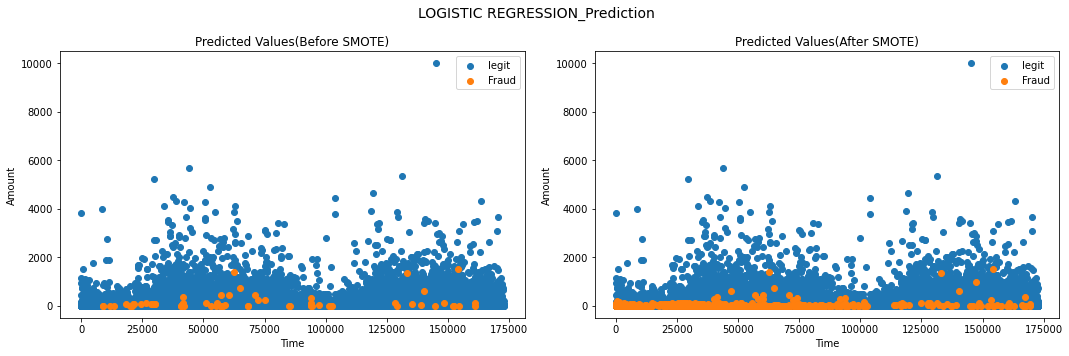

In [91]:
fig,ax = plt.subplots(figsize = (15,5),nrows=1,ncols = 2)

ax[0].scatter(x = plot_test[plot_test['Predicted_Class_log1'] == 0]['Time'],
              y = plot_test[plot_test['Predicted_Class_log1'] == 0]['Amount'],label = 'legit')
ax[0].scatter(x = plot_test[plot_test['Predicted_Class_log1'] == 1]['Time'],
              y = plot_test[plot_test['Predicted_Class_log1'] == 1]['Amount'],label = 'Fraud')

ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amount")

ax[0].set_title("Predicted Values(Before SMOTE)")
ax[0].legend()

ax[1].scatter(x = plot_test[plot_test['Predicted_Class_log'] == 0]['Time'],
              y = plot_test[plot_test['Predicted_Class_log'] == 0]['Amount'],label = 'legit')
ax[1].scatter(x = plot_test[plot_test['Predicted_Class_log'] == 1]['Time'],
              y = plot_test[plot_test['Predicted_Class_log'] == 1]['Amount'],label = 'Fraud')

ax[1].set_xlabel("Time")
ax[1].set_ylabel("Amount")

ax[1].set_title("Predicted Values(After SMOTE)")
ax[1].legend()

plt.suptitle("LOGISTIC REGRESSION_Prediction", fontsize=14)
plt.tight_layout()

* Smote gives good result by comparing before smote in logistic regresion
* but it is increased the False Positives
* Its fine because in this case we need to care about False Negatives
* because if False positives are high it can be identified as legit by further investigation but False Negatives(fraud predicted as legit) are high model is bad